### CLUSTERING & UNSUPERVISED LEARNING

## Humanitarian Aid: Clustering Countries Dynamically and Geographically to Assess Need
A Guide for All Non-Inter-Governmental-International Organizations 

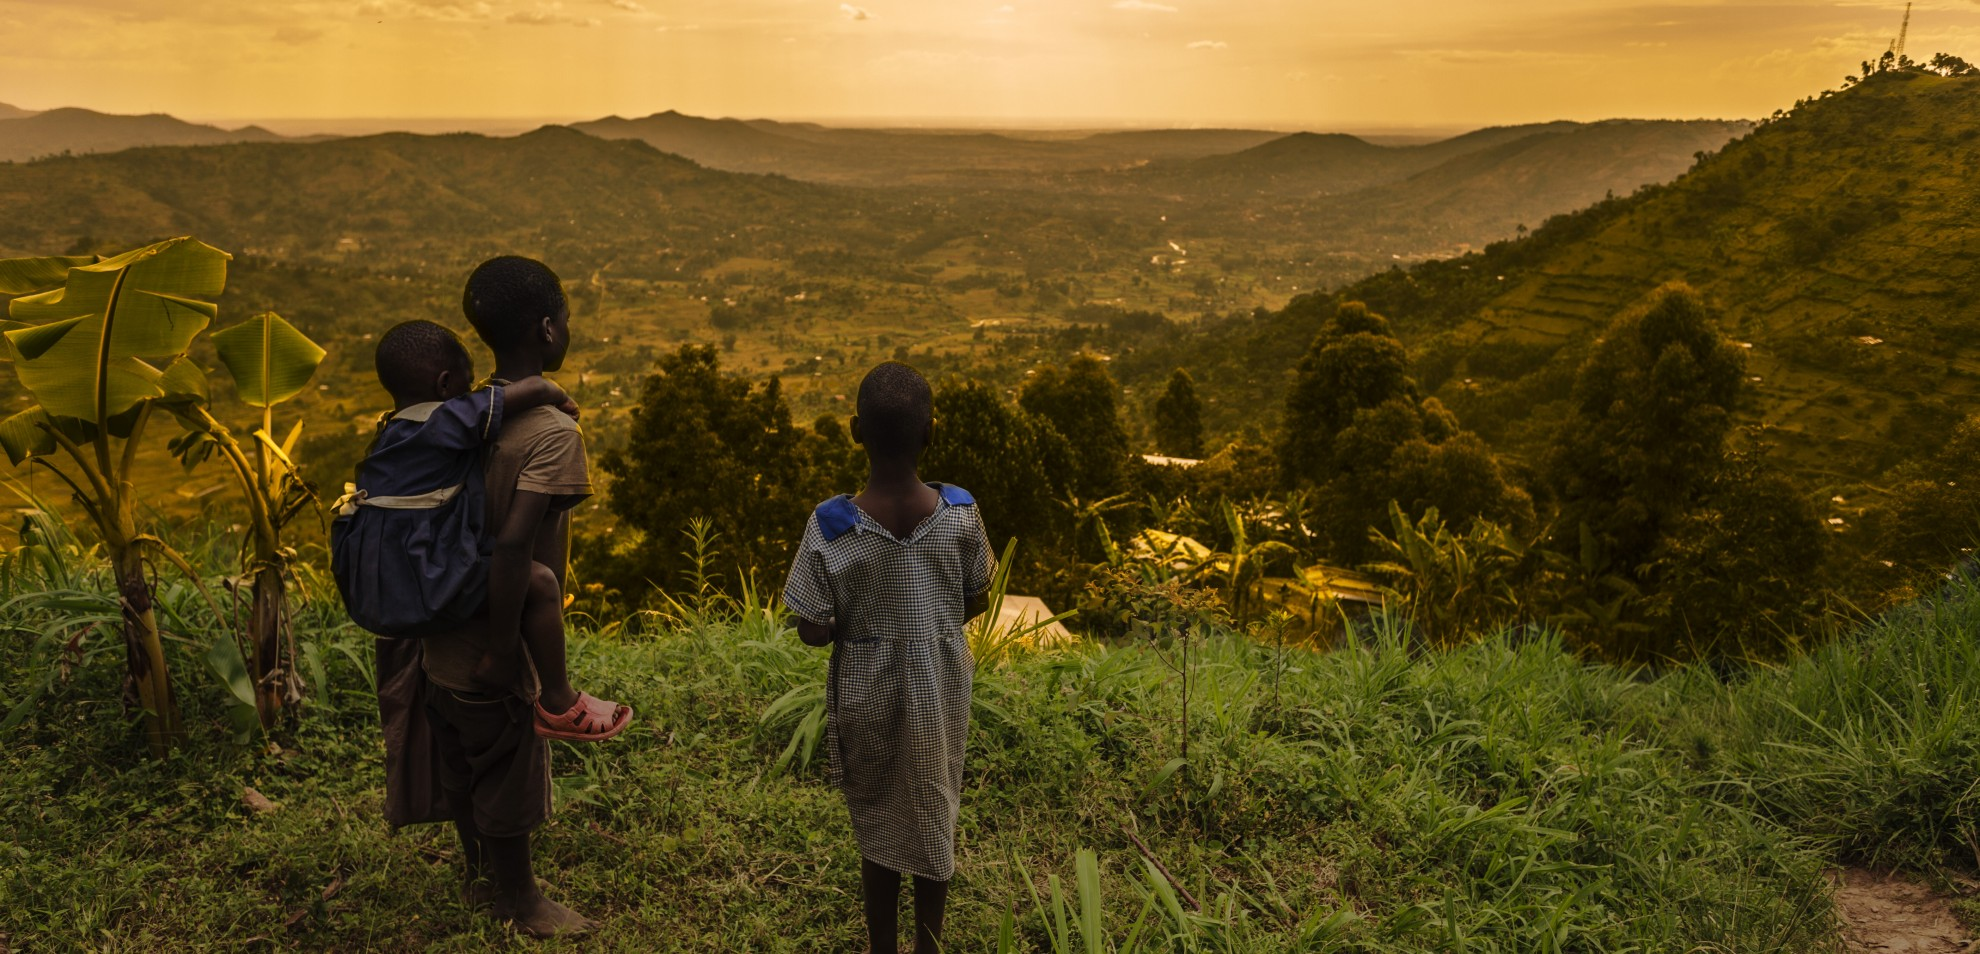

## Problem Identification

In [ ]:
Humanitarian Aid Organisations:
a) Non-Governmenal Organisations
b) Inter-Governmental Organisation
c) Internatonal Organisations

Following events such as disasters and natural calamities, operational projects
would be run along together with advocacy drives to raise awareness of the issues
and for funding purposes. Their remits are usually to fight poverty, provide basic amenities and
relief to the people in the poorest and least developed countries in the world.

This is actually the Standard Operating Procedures and Modus Operandi of most, if not all,
humananitarian organisations whose objectives are focused on aid to such countries.

After establishing their annual financial warchests; the next step is deciding how and
where best to deploy the funds strategically and effectively.

It is essential to strike the best balance in the aim to help the greatest number
of people in places with the direst needs. The least of which is just survival.  

Data analysis is crucial to identify and categorize these countries.
The Socio-Economic and Health indicators from 167 countries will be analysed.
This will involve univariate and bivariate analyses of the Principal Components
to investigate their correlation, if any, degrees of variance and covariance.


## DATA DICTIONARY
#### The country.csv contains the economic and health data of 167 countries 

### KEY [DESIGNATION] : DESCRIPTION
- **country** [Country] : Name of Country
    
- **GDPP** [GDP per capita] : Calculated as GDP/population
    
- **Child_Mort** [Child Mortality] :
    Death of Children under 5 years of age per 1000 Live Births
    
- **exports** [Exports] :
    Outgoing value of Goods & Services/population
    Given as %age of GDP per capita
        
- **health** [Health] :
    Health Spending/population. Given as %age of GDP per capita
    
- **imports** [Imports] :
    Incoming value of Goods & Services/population
    Given as %age of GDP per capita
        
- **PCI** [Income] :
    Net Income per person;
    calculated from GNP/population
    
- **inflation** [Inflation] :
    An periodic index(comparative) of the prices of Essential Goods

- **life_expec** [Life_Expectancy] :
    Average number (in years) a person is expected to live

- **total_fer** [Fertility] :
    Average number of children per woman                      


### Importing libraries

In [63]:
# Data Analysis & Data wrangling
import numpy as np
import pandas as pd
import missingno as mn
from random import sample
from numpy.random import uniform
from math import isnan

# Static Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

# Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
# import cufflinks
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='pearl')
from IPython.display import display, HTML
init_notebook_mode(connected=True)

# ML Libraries 
# SKLearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

# SciPy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [64]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting up the view options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Data Inspection & Cleaning

Inspect the various aspects of the `country_df` dataframe such as 
- `shape` for number of rows and columns
- `size` for memory usage
- `info()` for the presence of null values
- `nunique()` for checking how many unique entries present in each column and any column is of categorical in nature.
- `nunique() and duplicated` for duplicates analysis
- `describe()` for statistical information

In [4]:
# LOAD CSV
## DATAFRAME = ds

ds = pd.read_csv('Country-data.csv')
ds.head(10)

country  child_mort  exports  health  imports  income  inflation  life_expec  total_fer   gdpp
0          Afghanistan        90.2     10.0    7.58     44.9    1610      9.440        56.2       5.82    553
1              Albania        16.6     28.0    6.55     48.6    9930      4.490        76.3       1.65   4090
2              Algeria        27.3     38.4    4.17     31.4   12900     16.100        76.5       2.89   4460
3               Angola       119.0     62.3    2.85     42.9    5900     22.400        60.1       6.16   3530
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100      1.440        76.8       2.13  12200
5            Argentina        14.5     18.9    8.10     16.0   18700     20.900        75.8       2.37  10300
6              Armenia        18.1     20.8    4.40     45.3    6700      7.770        73.3       1.69   3220
7            Australia         4.8     19.8    8.73     20.9   41400      1.160        82.0       1.93  51900
8              Austria         4.3     51.3   11.00     47.8   43200      0.873        80.5       1.44  46900
9           Azerbaijan        39.2     54.3    5.88     20.7   16000     13.800        69.1       1.92   5840

ds.tail(10)

In [5]:
# Shape of dataframe
ds.shape

(167, 10)

In [6]:
# Datatypes of the columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b># Results</b><br>
<ul>
            <li>9 Numerical columns, continuous</li>
            <li>1 Categorical column as object</li>
            <li>167 rows as Targets and 9 columns as Factor Components</li>
        </ul>
        </span>    
</div>

In [7]:
# distribution of numerical values
ds.describe()

child_mort     exports      health     imports         income   inflation  life_expec   total_fer           gdpp
count  167.000000  167.000000  167.000000  167.000000     167.000000  167.000000  167.000000  167.000000     167.000000
mean    38.270060   41.108976    6.815689   46.890215   17144.688623    7.781832   70.555689    2.947964   12964.155689
std     40.328931   27.412010    2.746837   24.209589   19278.067698   10.570704    8.893172    1.513848   18328.704809
min      2.600000    0.109000    1.810000    0.065900     609.000000   -4.210000   32.100000    1.150000     231.000000
25%      8.250000   23.800000    4.920000   30.200000    3355.000000    1.810000   65.300000    1.795000    1330.000000
50%     19.300000   35.000000    6.320000   43.300000    9960.000000    5.390000   73.100000    2.410000    4660.000000
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   10.750000   76.800000    3.880000   14050.000000
max    208.000000  200.000000   17.900000  174.000000  125000.000000  104.000000   82.800000    7.490000  105000.000000

In [8]:
# Check for duplicates rows of data
ds_duplicate = ds.copy()
ds_duplicate.drop_duplicates(subset=None, inplace=True)
ds_duplicate.shape

(167, 10)

In [9]:
#Check column wise null values
ds.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# Checking row wise null values
(ds.isnull().sum(axis=1) * 100 / len(ds)).value_counts(ascending=False)

0.0    167
dtype: int64

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b># Results</b><br>
        No Duplicates; No Nulls
    </span>    
</div>

In [11]:
# Rename Columns
ds.rename(columns={'country':'Country'}, inplace=True)
ds.rename(columns={'Child_Mort':'Child_Mort'}, inplace=True)
ds.rename(columns={'exports':'Exports'}, inplace=True)
ds.rename(columns={'imports':'Imports'}, inplace=True)
ds.rename(columns={'health':'Health'}, inplace=True)
ds.rename(columns={'inflation':'Inflation'}, inplace=True)
ds.rename(columns={'Income':'Income'}, inplace=True)
ds.rename(columns={'total_fer':'Fertility'}, inplace=True)
ds.rename(columns={'life_expec':'Life_Expec'}, inplace=True)
ds.rename(columns={'GDPP': 'GDPP'}, inplace=True)

In [12]:
# Change Columns Order
ds.columns=('Country', 'GDPP', 'Income', 'Exports', 'Imports', 'Inflation', 'Health', 'Fertility', 'Child_Mort', 'Life_Expec')

In [13]:
ds.columns.index = 0
ds.head()

Country   GDPP  Income  Exports  Imports  Inflation  Health  Fertility  Child_Mort  Life_Expec
0          Afghanistan   90.2    10.0     7.58     44.9       1610    9.44       56.2        5.82         553
1              Albania   16.6    28.0     6.55     48.6       9930    4.49       76.3        1.65        4090
2              Algeria   27.3    38.4     4.17     31.4      12900   16.10       76.5        2.89        4460
3               Angola  119.0    62.3     2.85     42.9       5900   22.40       60.1        6.16        3530
4  Antigua and Barbuda   10.3    45.5     6.03     58.9      19100    1.44       76.8        2.13       12200

In [14]:
ds.tail()

Country  GDPP  Income  Exports  Imports  Inflation  Health  Fertility  Child_Mort  Life_Expec
162    Vanuatu  29.2    46.6     5.25     52.7       2950    2.62       63.0        3.50        2970
163  Venezuela  17.1    28.5     4.91     17.6      16500   45.90       75.4        2.47       13500
164    Vietnam  23.3    72.0     6.84     80.2       4490   12.10       73.1        1.95        1310
165      Yemen  56.3    30.0     5.18     34.4       4480   23.60       67.5        4.67        1310
166     Zambia  83.1    37.0     5.89     30.9       3280   14.00       52.0        5.40        1460

## UNIVARIATE ANALYSIS

In [15]:
## Function for visualizing the distribution of numerical columns

def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0], color="#4FAAA7")
        plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile", color="#9DE4AC")
        plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v', color="#CBFC53")
        plt.yscale('log')
    
    if v == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, color="#4CB391", order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

### 1. **GDPP** [GDP per capita] :
    Calculated as GDP/population

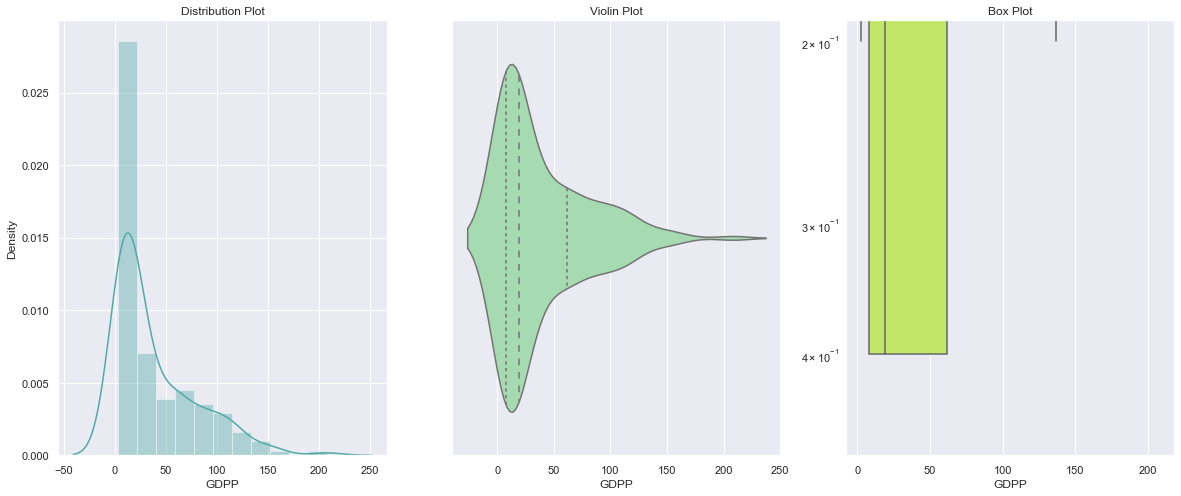

In [16]:
# Distribution of "GDP per capita" column
uni(df=ds,col='GDPP',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        GDP per capita (GDPP) has outliers.
    </span>    
</div>

### 2. **PCI** [Income] :
    Net Income per person;
    calculated from GNP/populationIncome

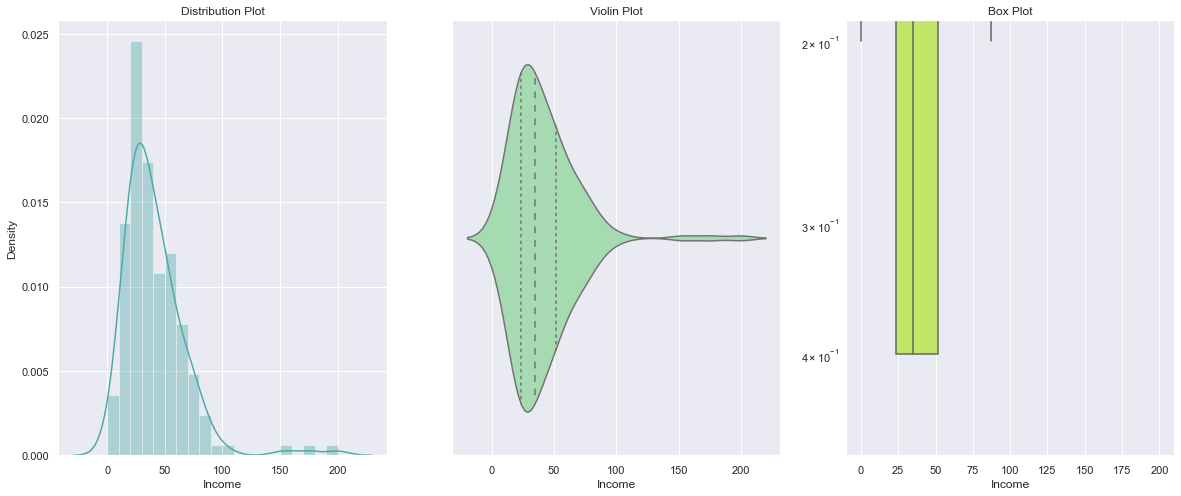

In [17]:
# Distribution of 'Income" column

uni(df=ds,col='Income',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Income has outliers.
    </span>    
</div>

### 3. **exports** [Exports] :
    Outgoing value of Goods & Services/population
    Given as %age of GDP per capita

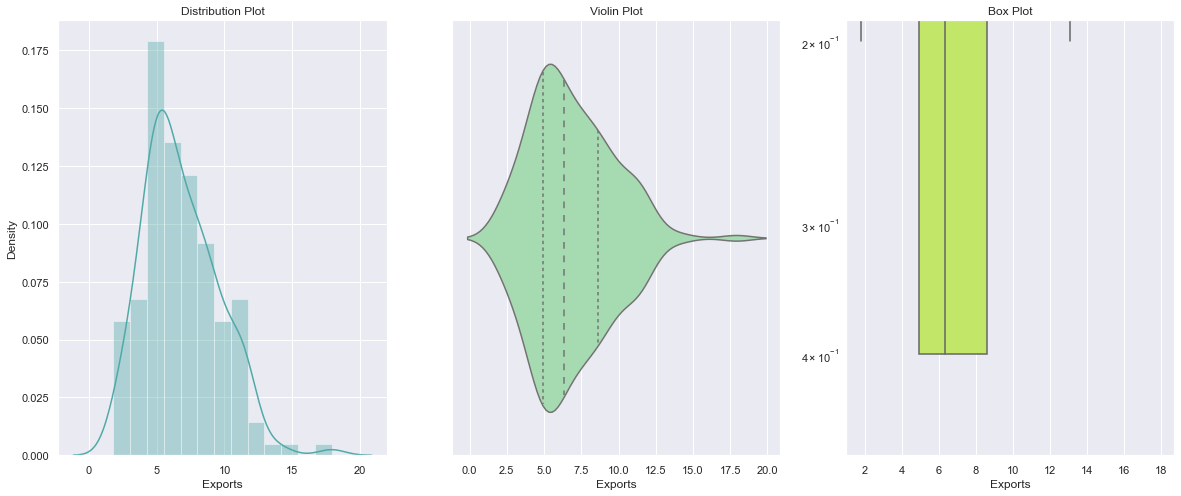

In [18]:
# Distribution of 'Exports' column
uni(df=ds,col='Exports',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Exports has several outliers.
    </span>    
</div>

### 4. **imports** [Imports] :
    Incoming value of Goods & Services/population
    Given as %age of GDP per capita 

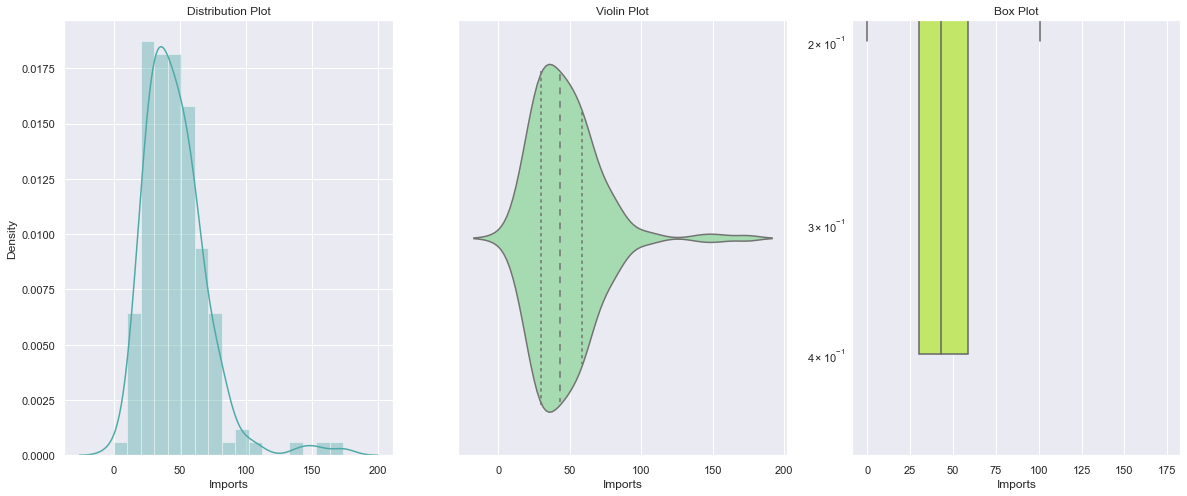

In [19]:
# Distribution of 'Imports' column

uni(df=ds,col='Imports',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Imports has some outliers.
    </span>    
</div>

### 5. **inflation** [Inflation] :
    An periodic Index of the prices of Essential Goods

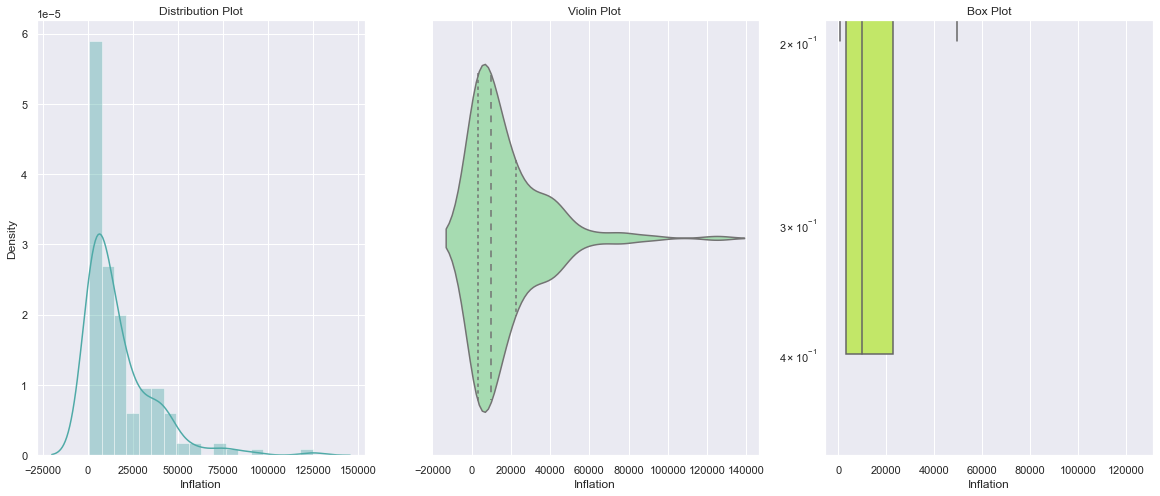

In [20]:
# Distribution of 'Inflation' column

uni(df=ds,col='Inflation',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Inflation has some outliers.
    </span>    
</div>

### 6. **health** [Health] :
    Health Spending/population. Given as %age of GDP per capita

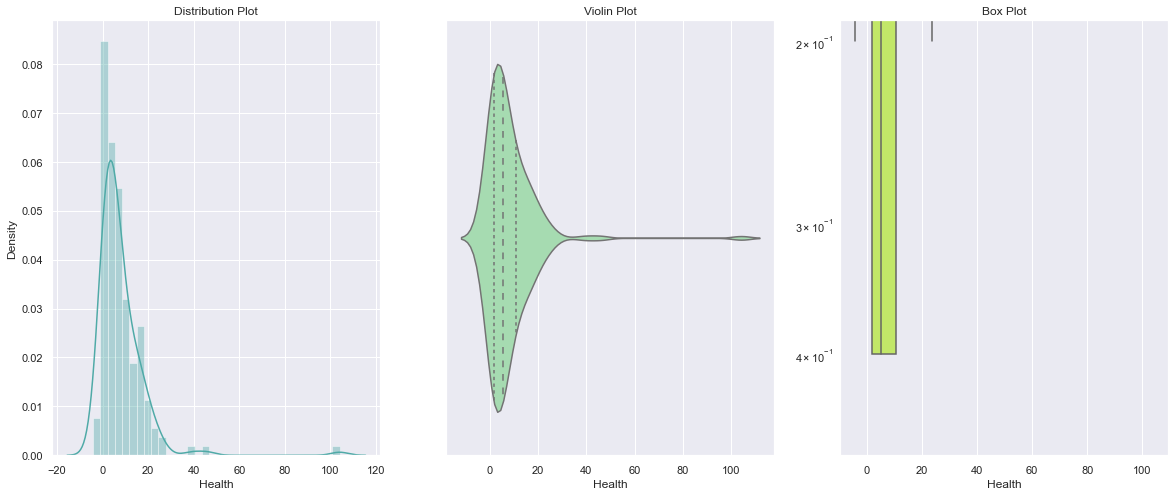

In [21]:
# Distribution of 'Health' column

uni(df=ds,col='Health',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Health has only 1 outliers.
    </span>    
</div>

### 7. **total_fer** [Fertility] :
    Average number of children per woman                  

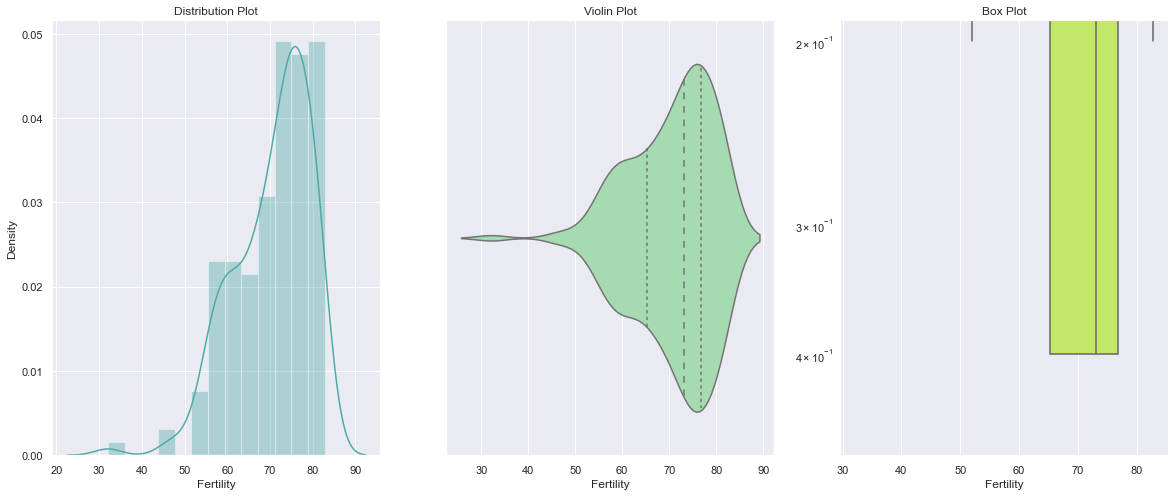

In [22]:
# Distribution of "Total_Fert" column
uni(df=ds,col='Fertility',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Result: </b><br>
        Fertility values have only one outlier.
    </span>    
</div>

### 8. **Child_Mort** [Child_Mortality] :
    Death of Children under 5 years of age per 1000 Live Births                  

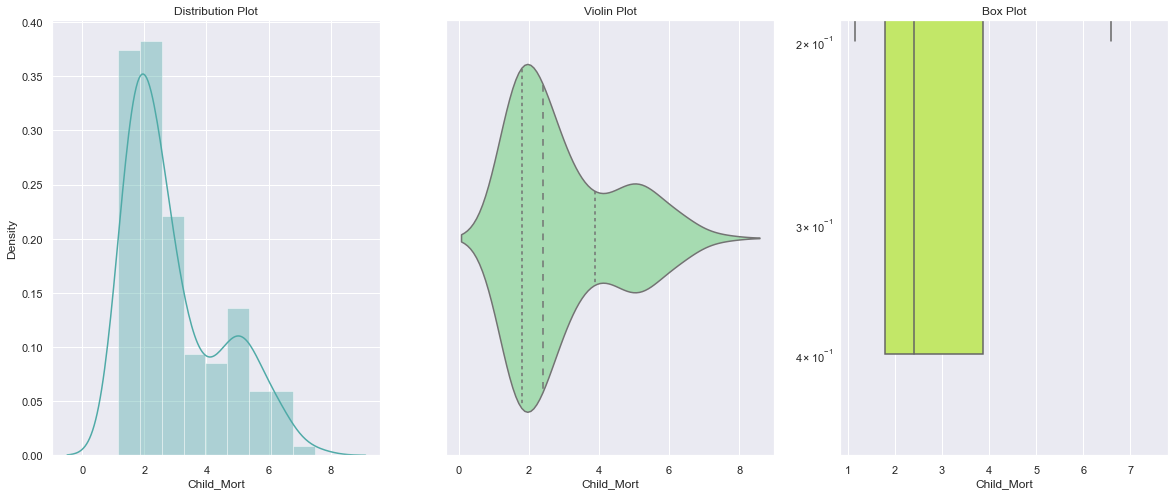

In [23]:
# Distribution of "Child_Mort" column
uni(df=ds,col='Child_Mort',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Child Mortality Rate has only one outlier.
    </span>    
</div>

### 9. **life_expec** [Life_Expectancy] :
    Average number (in years) a person is expected to live

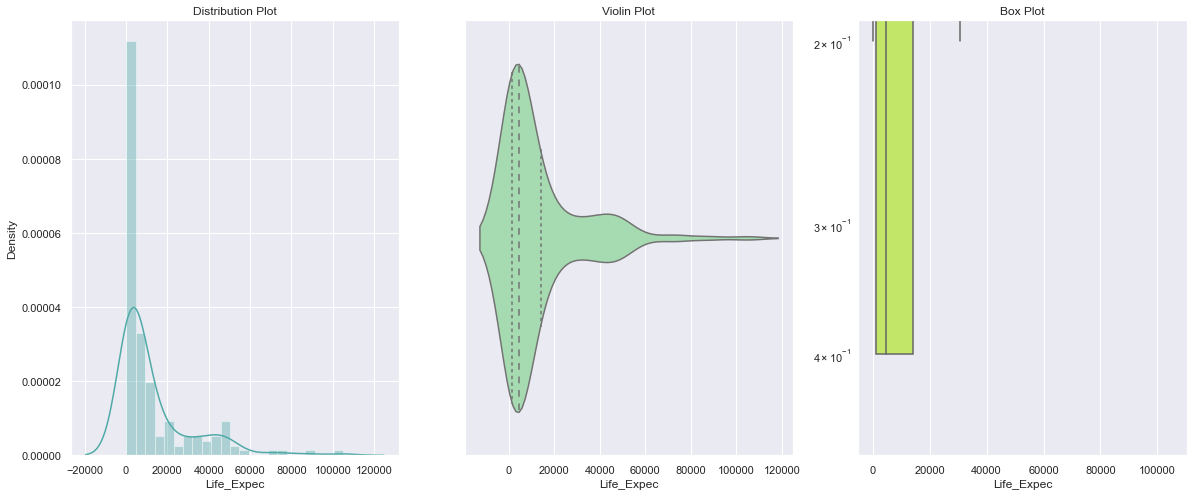

In [24]:
# Distribution of 'Life_Expec' column
uni(df=ds,col='Life_Expec',v=0)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Life Expectancy values have outliers but only from below First Quartile.
    </span>    
</div>

## BIVARIATE & GEOGRAPHICAL ANALYSIS

In [25]:
# 8. CHILD MORTALITY
temp = ds[['Country','Child_Mort']]

# 20 largest Child_Mort values   
temps = temp.nlargest(20, columns=['Child_Mort'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Child_Mort'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the HIGHEST Child Mortality rate')
fig.show()

In [26]:
# Plotting World Map
df_fed = ds.groupby('Country')['Child_Mort'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Child_Mort",
                    locationmode = "country names",
                    hover_name="Country", 
                    color_continuous_scale="Reds",
                    title = 'Country-wise Child Mortality Rate')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Haiti has the highest Child Mortality rate followed by Sierra Leone and Chad</li>
            <li>From the World Heatmap, Central and West African countries have very high Child Mortality rates</li>
            <li>Afganisthan and Pakistan have the highest child mortality rate in Asia. </li>
        </ul>
    </span>    
</div>

In [27]:
# 1. GDPP
temp = ds[['Country','GDPP']]
    
# 20 Smallest GDPP values
temps = temp.nsmallest(20, columns=['GDPP'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['GDPP'].values,
    marker_color=colors
)])
fig.update_layout(title_text='20 Countries with the LOWEST GDPP')
fig.show()

In [28]:
df_fed = ds.groupby('Country')['GDPP'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="GDPP",
                    locationmode = 'country names',
                    hover_name='Country', 
                    color_continuous_scale="picnic_r",
                    title = 'GDP per capita of Countries')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Burundi has the lowest GDP per capita followed by Liberia and Congo</li>
            <li>From World Heatmap, majority of countries have very low or low GDP</li>
            <li>Norway has the highest GDPP</li>
        </ul>
    </span>    
</div>

In [29]:
# 3. Exports
temp = ds[['Country','Exports']]
    

temps = temp.nsmallest(20, columns=['Exports'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Exports'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the LOWEST Exports')
fig.show()

In [30]:
df_fed = ds.groupby('Country')['Exports'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Exports",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="electric_r",
                    title = 'Exports per Country')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Myanmar has the lowest Export Rate followed by East Timor and Eritrea</li>
            <li>From World Heatmap, Exports are higher in African countries.</li>
            <li>Luxembourg has the highest Export percentage with respect to GDP </li>
        </ul>
    </span>    
</div>

In [31]:
# 6. Health
temp = ds[['Country','Health']]
    

temps = temp.nsmallest(20, columns=['Health'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Health'].values,
    marker_color=colors
)])
fig.update_layout(title_text='20 Countries that spend the LEAST on Healthcare')
fig.show()

In [32]:
df_fed = ds.groupby('Country')['Health'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Health",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="picnic_R",
                    title = 'Healthcare Expenditures of Countries')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Qatar, Myanmar and Pakistan spend the least on Healthcare</li>
            <li>From World Heatmap, West African and Asian countries Healthcare spending very low</li>
            <li>North American and European countries spend the most on Healthcare</li>
        </ul>
    </span>    
</div>

In [33]:
# 4. Imports
temp = ds[['Country','Imports']]
    

temps = temp.nsmallest(20, columns=['Imports'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Imports'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the LOWEST Imports')
fig.show()

In [34]:
df_fed = ds.groupby('Country')['Imports'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Imports",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="tealrose_r",
                    title = 'Imports per Country')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Myanmar has the lowest Import rates.</li>
            <li>From World Heatmap, see that Imports are evenly distributed.</li>
            <li>Luxembourg has the highest Imports and Exports. </li>
        </ul>
    </span>    
</div>

In [35]:
# 2. Income
temp = ds[['Country','Income']]
    

temps = temp.nsmallest(20, columns=['Income'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Income'].values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='20 Countries with the LOWEST Income')
fig.show()

In [36]:
df_fed = ds.groupby('Country')['Income'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Income",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="picnic_r",
                    title = 'Income per Country')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Congo has the lowest Income followed by Liberia and Burundi</li>
            <li>From World Heatmap, African, South American and Asian countries have very low Incomes.</li>
            <li>Qatar has the highest Income. </li>
        </ul>
    </span>    
</div>

In [37]:
# 5. Inflation
temp = ds[['Country','Inflation']]
    

temps = temp.nlargest(20, columns=['Inflation'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Inflation'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the HIGHEST Inflation Rates')
fig.show()

In [38]:
df_fed = ds.groupby('Country')['Inflation'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Inflation",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="picnic",
                    title = 'Inflation Rates per Country')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Nigeria has the highest Inflation Rate followed by Venezuela and Mongolia</li>
            <li>From World Heatmap, Inflation is quite evenly distributed.</li>
        </ul>
    </span>    
</div>

In [39]:
# 9. Life Expectancy
temp = ds[['Country','Life_Expec']]
    

temps = temp.nsmallest(20, columns=['Life_Expec'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Life_Expec'].values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='20 Countries with the LOWEST Life Expectancy Rates')
fig.show()

In [40]:
df_fed = ds.groupby('Country')['Life_Expec'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Life_Expec",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="agsunset",
                    title = 'Life Expectancy Rates of Countries')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
<ul>
            <li>Haiti has the LOWEST Life xpectancy followed by Lesotho and the Central African Republic</li>
            <li>From World Heatmap, Central, West and South African countries have very low Life Expectancy.</li>
        </ul>
    </span>    
</div>

In [41]:
temp = ds[['Country','Fertility']]
    

temps = temp.nlargest(20, columns=['Fertility'])
temps.reset_index(drop=True, inplace=True)

colors = ['#FE7176'] * 20
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[10] = '#FF956A'
colors[11] = '#FF956A'
colors[12] = '#FF956A'
colors[13] = '#FF956A'
colors[13] = '#FF956A'
colors[14] = '#FF956A'
colors[15] = '#FF956A'
colors[16] = '#FF956A'
colors[17] = '#FF956A'
colors[18] = '#FF956A'
colors[19] = '#84D2C3'

fig = go.Figure(data=[go.Bar(
    x=temps['Country'].values,
    y=temps['Fertility'].values,
    marker_color=colors 
)])
fig.update_layout(title_text='20 Countries with the HIGHEST Fertility rates')
fig.show()

In [42]:
df_fed = ds.groupby('Country')['Fertility'].sum().reset_index()

fig = px.choropleth(df_fed, locations="Country",
                    color="Fertility",
                    locationmode = 'country names',
                    hover_name="Country", 
                    color_continuous_scale="haline_r",
                    title = 'Fertility Rates per Countries')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Resultss: </b><br>
<ul>
            <li>Niger has the Highest Fertility Rate followed by Chad and Mali</li>
            <li>From World Heatmap, Central and West African countries have very high Fertility Rates.</li>
            <li>Afganisthan also has very high Fertility rate compared to other Asian countries. </li>
        </ul>
    </span>    
</div>

## MUTLIVARIATE

In [43]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

In [44]:
# plotting a pair plot
fig = FF.create_scatterplotmatrix(ds.iloc[:,1:10], diag='box', size=2, height=1100, width=1100)
iplot(fig)

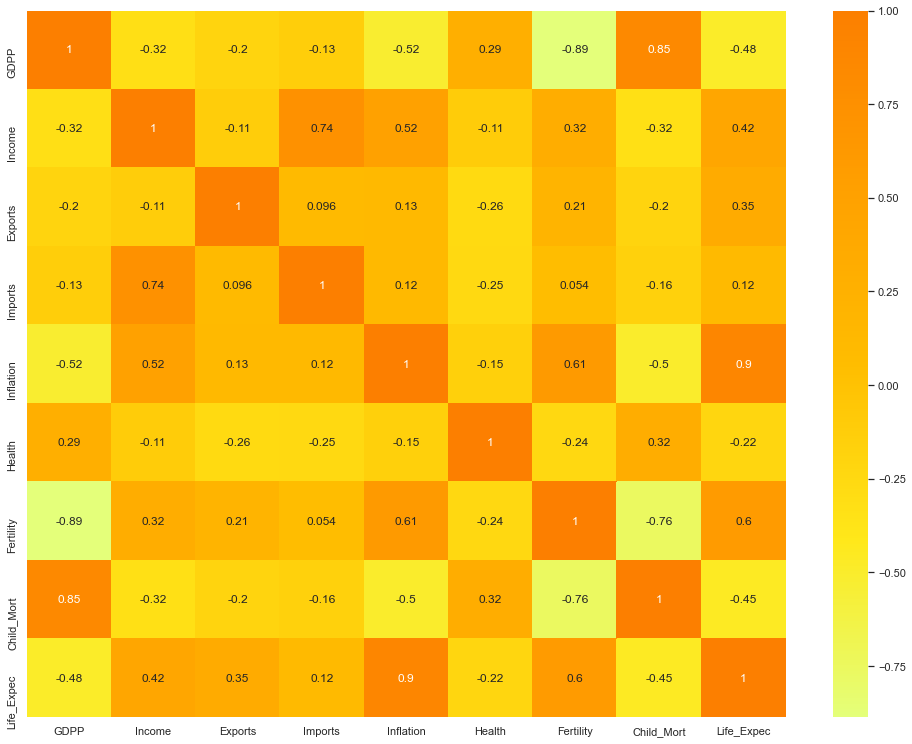

In [45]:
# Plot a Correlation matrix
plt.figure(figsize = (17, 13))
sns.heatmap(ds.corr(), annot = True, cmap="Wistia")
plt.savefig('Correlation')
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        <ul>
            <li> GDP and Income have High POSITIVE correlation (0.9). This means countries where Income is High; GDPis also </li>
            <li> Life Expectency and Child Mortality have High NEGATIVE correlation (-0.89)</li>
            <li> Total Fertility and Child Mortality have High correlation. </li>
            <li> Fertility is also NEGATIVEly correlated with Life Expectency</li>
            <li> Exports and Imports have High correlation. </li>
            <li> Income has POSITIVE correlation (0.61) compared with Life Expectency and NEGATIVE correlation (-0.52) with Child Mortality.<li>
            <li> Indicates countries with Higher Income values can spend more in Healhcare which reduces the Child Mortality and raises Life Expectency</li>
            <li> GDP is NEGATIVEly correlated with Fertility (-0.45); Developed Countries have lower birthrates compared to Underdeveloped Countries</li>            
        </ul>
    </span>    
</div>

## OUTLIER TREATMENT

In [46]:
# Checking for outliers

features = ds.columns[1:]
fig = make_subplots(rows=3, cols=3)
count = 0

for i in range(1,4):
    for j in range (1,4):
        col = features[count]
        count = count+1
        fig.add_trace(
            go.Violin(y=ds[col],
                      box_visible=True, 
                      line_color='black',
                       meanline_visible=True,
                      fillcolor='#3AD44D', 
                      opacity=0.6,
                      x0=col
                     ),row=i, col=j)
fig.update_layout(height=800, width=800, title_text="Distribution of Numerical Columns")
fig.update_traces(showlegend=False)

fig.show()        

<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Note Bene: </b><br>
        Removal of Outliers would definitely impact the Rankings of Countries, as Outliers treated by Deletion based on IQR values, would result in
        some deserving countries being removed from the NEED list. BUT, if Outliers are not removed, accuracy of the Clustering Model would be impacted
        as the presence of Outliers can change the CENTROID (K-Means) of the cluster.<br><br>
    </span>    
</div>

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Approach: </b><br>
        Instead of deleting the outliers, we propose to cap only the necessary features (Upper or Lower based on Feature importance). The capping would be done based on 1% for lower and 99% for the upper values. <br><br>
    </span>    
</div>

In [47]:
#Capping Values
uGDPP = ds['GDPP'].quantile(0.99)
uIncome = ds['Income'].quantile(0.99)
uhealth = ds['Health'].quantile(0.99)
uimport = ds['Imports'].quantile(0.99)
uexport = ds['Exports'].quantile(0.99)
uinflation = ds['Inflation'].quantile(0.99)

print('Total number of rows getting capped for GDPP : ', len(ds[ds['GDPP']>uGDPP]))
print('Total number of rows getting capped for Income : ', len(ds[ds['Income']>uIncome]))
print('Total number of rows getting capped for Health : ', len(ds[ds['Health']>uhealth]))
print('Total number of rows getting capped for Imports : ', len(ds[ds['Imports']>uimport]))
print('Total number of rows getting capped for Exports : ', len(ds[ds['Exports']>uexport]))
print('Total number of rows getting capped for Inflation : ', len(ds[ds['Inflation']>uinflation]))


# Capping the GDPP and Income values
ds['GDPP'][ds['GDPP']>uGDPP] = uGDPP
ds['Income'][ds['Income']>uIncome] = uIncome
ds['Health'][ds['Health']>uhealth] = uhealth
ds['Imports'][ds['Imports']>uimport] = uimport
ds['Exports'][ds['Exports']>uexport] = uexport
ds['Inflation'][ds['Inflation']>uinflation]= uinflation

Total number of rows getting capped for GDPP :  2
Total number of rows getting capped for Income :  2
Total number of rows getting capped for Health :  2
Total number of rows getting capped for Imports :  2
Total number of rows getting capped for Exports :  2
Total number of rows getting capped for Inflation :  2


In [48]:
# Checking for outliers after Capping

features = ds.columns[1:]
fig = make_subplots(rows=3, cols=3)
count = 0

for i in range(1,4):
    for j in range (1,4):
        col = features[count]
        count = count+1
        fig.add_trace(
            go.Violin(y=ds[col],
                      box_visible=True, 
                      line_color='black',
                       meanline_visible=True,
                      fillcolor='#FEFD00', 
                      opacity=0.6,
                      x0=col
                     ),row=i, col=j)
fig.update_layout(height=800, width=800, title_text="Distribution of Numerical Columns")
fig.update_traces(showlegend=False)

fig.show()

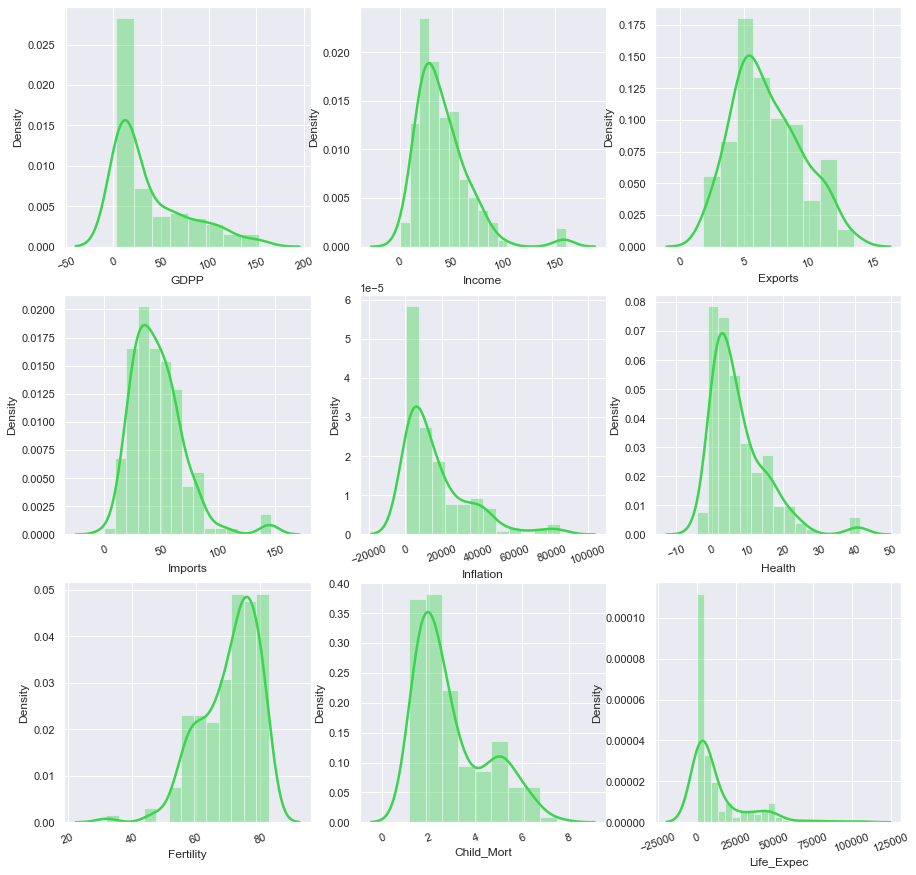

In [49]:
# Checking the Distribution after Capping

plt.figure(figsize=(15, 15))
features = ds.columns[1:]
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(ds[i[1]],color = '#3AD44D')
    plt.xticks(rotation=20)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Some Outliers remain but would not impact our Model.<br><br>
    </span>    
</div>

## SCALING

In [50]:
# Create a dataframe with only numerical columns

ds_num = ds.drop(['Country'], axis=1)
features = ds_num.columns
ds_num.head(2)

GDPP  Income  Exports  Imports  Inflation  Health  Fertility  Child_Mort  Life_Expec
0  90.2    10.0     7.58     44.9     1610.0    9.44       56.2        5.82         553
1  16.6    28.0     6.55     48.6     9930.0    4.49       76.3        1.65        4090

In [51]:
scaler = StandardScaler()

#fit_transform
ds_scaled = scaler.fit_transform(ds_num)
ds_scaled

array([[ 1.34400562, -1.19927911,  0.30123858, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.54749743, -0.49806893, -0.08896601, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27250989, -0.09292528, -0.99060381, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37530897,  1.21600038,  0.02089742, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.47278343, -0.42015669, -0.60797601, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.16153726, -0.14746385, -0.33900002, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [52]:
#Checking the scaled data

ds_scaled = pd.DataFrame(ds_scaled)
ds_scaled.columns = features
ds_scaled.head()

GDPP    Income   Exports   Imports  Inflation    Health  Fertility  Child_Mort  Life_Expec
0  1.344006 -1.199279  0.301239 -0.076771  -0.851668  0.265002  -1.619092    1.902882   -0.679180
1 -0.547497 -0.498069 -0.088966  0.083204  -0.386946 -0.372075   0.647866   -0.859973   -0.485623
2 -0.272510 -0.092925 -0.990604 -0.660465  -0.221053  1.122161   0.670423   -0.038404   -0.465376
3  2.084159  0.838126 -1.490672 -0.163244  -0.612045  1.932987  -1.179234    2.128151   -0.516268
4 -0.709406  0.183663 -0.285963  0.528541   0.125254 -0.764618   0.704258   -0.541946   -0.041817

## HOPKINS STATISTICS
#### To check Cluster tendency, use the Hopkins Test.
The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set. It acts as a statistical hypothesis test, where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value closed to 1 tends to indicate the data is highly clustered. Random data will tend to result in values around 0.5, and Uniformly Distributed data will tend to result in values close to 0.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [53]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [54]:
# Hopkins Score for Scaled Features
hopkins(ds_scaled)

0.8167020150278568

In [55]:
# Hopkins Score for Unscaled Features
hopkins(ds_num)

0.8681760919547851

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Hopkins Score is above 0.7 and closer to 1 which means our data has a high tendency to cluster.<br><br>
    </span>    
</div>

# K-MEANS CLUSTERING    
   ##### K-means Clustering is one of the Simplest and most popular Unsupervised Machine Learning Algorithms.

The algorithm works as follows:

First we initialize K points, called MEANS, randomly. We categorize each item to its closest Mean and update the Mean’s coordinates; which are the averages of the items categorized in that Mean so far. The process is repeated for a given number of Iterations. Concluding the process, we have our clusters.

## SSD (ELBOW CURVE)
##### To Ascertain the Optimal Number of Clusters via the Elbow Curve.
    
A fundamental step for any Unsupervised Algorithm is to Determine the optimal Number of Clusters which the data may be Clustered. The Elbow Method is one of the most popular methods to determine this Optimal Value of K.

In [56]:
# Elbow Curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ds_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
ssddf = pd.DataFrame(ssd)
ssddf.columns = ['SSD']
fig = go.Figure(data=go.Scatter(x=range_n_clusters, y=ssddf['SSD']))
fig.update_layout(height=500, width=800, title_text="SSD/Elbow Curve", shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 4, x1= 4
    )
] )
fig.show()

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Looking at the above elbow curve, it looks good to proceed with either 3 or 4 Clusters.<br><br>
    </span>    
</div>

## SILHOUETTE ANALYSIS
#### Equation:

<span style="font-size:6mm" >
    <span style ='font-family:Georgia'>
        <font color = blue > Silhouette score =
            <span style="display: inline-block;vertical-align: middle;">
                <div style="text-align: center;border-bottom: 1px solid black;">p-q</div>
                <div style="text-align: center;">max(p,q)</div> 
            </span>
        </font>
    </span>
</span>
   
    
    
    
<p>
    <span style='font-family:Georgia'>
        <b>p</b>  is the mean distance to the points in the nearest cluster that the data point is not a part of <br>
        <b>q</b>  is the mean intra-cluster distance to all the points in its own cluster.
    </span>
</p>

<span style='font-family:Georgia'>
    <ul>
        <li>The value of the silhouette score range lies between -1 to 1.</li>
        <li>A score closer to 1 indicates that the data point is very similar to other data points in the cluster</li>
        <li>A score closer to -1 indicates that the data point is not similar to the data points in its cluster</li>
    </ul>
</span>  


# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ds_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ds_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [3]:
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(ds_scaled)
    sse_.append([k, silhouette_score(ds_scaled, kmeans.labels_)])



ssedf = pd.DataFrame(sse_)
fig = go.Figure(data=go.Scatter(x=pd.DataFrame(sse_)[0], y=pd.DataFrame(sse_)[1]))
fig.update_layout(height=500, width=800, title_text="Silhouette Analysis", shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 4, x1= 4
    )
])
fig.show()

NameError: name 'KMeans' is not defined

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
         From the Silhouette Analysis, can see that 4 clusters are optimal for our model. 
    </span>    
</div>

## MODEL BUILDING

In [4]:
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 350)
kmeans_4.fit(ds_scaled)
kmeans_4.labels_

NameError: name 'KMeans' is not defined

In [5]:
ds['KCluster_4_Label'] = kmeans_4.labels_
ds.head()

NameError: name 'kmeans_4' is not defined

In [6]:
ds['KCluster_4_Label'].value_counts()

NameError: name 'ds' is not defined

## CLUSTER ANALYSIS

In [7]:
im = ds['KCluster_4_Label'].value_counts()
df = pd.DataFrame({'labels': ['0', '1', '3', '2'],'values': im.values})
df.iplot(kind='pie', labels='labels', values='values', title='K-Means Clustering - Cluster Size Comparison',
         hole = 0.5, colors=['#63D7CF','#FD7B80', '#FCBF8A', '#F7EDCD'])


NameError: name 'ds' is not defined

In [8]:
df_fed = ds.groupby('Country')['KCluster_4_Label'].sum().reset_index()

fig = px.choropleth(df_fed, locations=ds['Country'],
                    color='KCluster_4_Label',
                    locationmode = 'country names',
                    hover_name=ds['Country'], 
                    color_continuous_scale="picnic_r",
                    title = 'Cluster of Countries')
fig.show()

NameError: name 'ds' is not defined

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Result: </b><br>
        Majority of African countries are in Cluster 1.
    </span>    
</div>

In [9]:
#Checking the spread and density of clusters
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
sns.swarmplot(x='KCluster_4_Label', y='Child_Mort', data=ds, palette="cool")
plt.subplot(1, 3, 2)
sns.swarmplot(x='KCluster_4_Label', y='GDPP', data=ds, palette="cool")
plt.subplot(1, 3, 3)
sns.swarmplot(x='KCluster_4_Label', y='Income', data=ds, palette="cool")

plt.show()

NameError: name 'plt' is not defined

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Cluster 1 has the Highest Child Mortality rate.
    </span>    
</div>

In [10]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'KCluster_4_Label'].sum().reset_index()
fig = px.scatter(df_fed, x="GDPP", y="Child_Mort", color='KCluster_4_Label', hover_data=['Country'],
                 color_continuous_scale='sunsetdark', title="GDP vs Child Mortality of Clusters")
fig.show()

NameError: name 'ds' is not defined

In [11]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'KCluster_4_Label'].sum().reset_index()
fig = px.scatter(df_fed, x="Income", y="Child_Mort", color='KCluster_4_Label', hover_data=['Country'],title="Income vs Child Mortality of Clusters", color_continuous_scale='sunsetdark')
fig.show()

NameError: name 'ds' is not defined

In [ ]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'KCluster_4_Label'].sum().reset_index()
fig = px.scatter(df_fed, x="GDPP", y="Income", color='KCluster_4_Label', size='Child_Mort', hover_data=['Country'],title="GDP vs Income of Clusters sized on Child Mortality Rate", color_continuous_scale='sunsetdark')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Result: </b><br>
        The Scatter Plot indicates we focus on Cluster 1.
    </span>    
</div>

In [ ]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'KCluster_4_Label'].sum().reset_index()
fig = px.scatter_3d(df_fed, x="GDPP", y="Income", color='KCluster_4_Label', z='Child_Mort', hover_data=['Country'],title="GDP vs Income of Clusters sized on Child Mortality Rate", color_continuous_scale='rainbow', opacity=0.6)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Result: </b><br>
        The 3D Scatter Plot show that Cluster 1 has the Highest Child Mortality Rate as well as Lowest Income and GDP as compared to other Clusters
    </span>    
</div>

## MODEL INTERPRETATION

In [ ]:
# Checking Countries under Cluster 1
ds[ds['KCluster_4_Label']==1]

In [ ]:
# Group by analysis
k_analysis =  ds.groupby(['KCluster_4_Label']).mean()
k_analysis

In [ ]:
# Countries Count in each cluster

k_analysis['Count']=ds.groupby('KCluster_4_Label')['Country'].count()
k_analysis

In [ ]:
# Proportion out of 1
k_analysis['Proportion']=round(k_analysis['Count']/k_analysis['Count'].sum(),2)
k_analysis

In [ ]:
features =k_analysis.columns[:-2]
fig = make_subplots(rows=3, cols=3)
count = 0

for i in range(1,4):
    for j in range (1,4):
        col = features[count]
        count = count+1
        fig.add_trace(
            go.Bar(x=k_analysis.index,
                   y=k_analysis[col],
                   marker={'color': k_analysis.index,
                   'colorscale': 'oryel'},
                   text=round(k_analysis[col],2),
                   textposition = "outside",
                   ),row=i, col=j)
        fig.update_yaxes(title_text=col, row=i, col=j)

fig.update_layout(height=1500, width=1200, title_text="K-Means Cluster - Feature Mean Values")
fig.update_traces(showlegend=False)

fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Based on above, Cluster 1 Countries should definitely be on the Aid shortlist: 
        <ul>
            <li>They have Highest Child Mortality</li>
            <li>Lowest Income</li>
            <li>Lowest GDP</li>
            <li>Lowest Health expenditure</li>
            <li>Highest Inflation rate</li>
            <li>Low Life Expectancy to Developed countries</li>
            <li>Highest Fertility</li>
        </ul>
    </span>    
</div>

In [ ]:
cluster_km=ds[ds['KCluster_4_Label']==1]
cluster_km.sort_values(['GDPP','Income','Child_Mort','Health','Inflation','Life_Expec','Fertility','Imports','Exports'], ascending=[True,True,False,True,False,True,False,False,True]).head(5)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Based on K-Means Clustering: The following 5 countries have been identified as most in need of Hmanitarian Aid.
        <ul>
            <li>Burundi</li>
            <li>Liberia</li>
            <li>Congo</li>
            <li>Niger</li>
            <li>Sierra Leone</li>
        </ul>
    </span>    
</div>

# HIERARCHICAL CLUSTERING<h2>
    
##### Hierarchical Clustering: Involves Creating Clusters that have a predetermined ordering from top to bottom. 
  
 
There are two types of Hierarchical Clustering:
- Divisive
- Agglomerative.

## SINGLE LINKAGE 

##### Single Linkage is based on Grouping Clusters in Bottom-Up fashion (Agglomerative Clustering)
    
In Single Linkage Hierarchical Clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster

In [ ]:
figure = FF.create_dendrogram(
    ds_scaled, orientation='bottom',
    linkagefun=lambda x: linkage(ds_scaled, method="single", metric='euclidean'))
figure.update_layout(height=500, width=1000, title_text="Hierarchical Clustering Dendrogram - Single Linkage")
figure.update_traces(showlegend=False)
figure.update_xaxes(title_text='Index', tickfont=dict(size=5))
figure.update_yaxes(title_text='Distance')
figure.show()

## COMPLETE LINKAGE 

##### Complete Linkage is based on Grouping Clusters through Farthest Neighbour Clustering (Agglomerative Clustering)
    
In Complete Linkage Hierarchical Clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

In [ ]:
figure = FF.create_dendrogram(
    ds_scaled, orientation='bottom',
    linkagefun=lambda x: linkage(ds_scaled, method="complete", metric='euclidean'))
figure.update_layout(height=500, width=1000, title_text="Hierarchical Clustering Dendrogram - Complete Linkage")
figure.update_traces(showlegend=False)
figure.update_xaxes(title_text='Index', tickfont=dict(size=5))
figure.update_yaxes(title_text='Distance')
figure.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        From the Dendrograms, 'Complete Linkage' gives a better cluster formation.
        So we will use Complete Linkage output for our Model.
    </span>    
</div>

## MODEL BUILDING

In [ ]:
mergings_c = linkage(ds_scaled, method="complete", metric='euclidean')

In [ ]:
hcluster_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
hcluster_4

In [ ]:
ds['HCluster_4_Label'] = hcluster_4
ds.head()

In [ ]:
ds['HCluster_4_Label'].value_counts()

## CLUSTER ANALYSIS

In [ ]:
im = ds['HCluster_4_Label'].value_counts()
df = pd.DataFrame({'labels': ['1', '0', '2', '3'],'values': im.values})
df.iplot(kind='pie',labels='labels',values='values', title='Hierarchical Clustering - Cluster Size Comparison',
         hole = 0.5, colors=['#A2DCFA','#FDA3A9', '#F0B8F2', '#DCF5A3'])

In [ ]:
df_fed = ds.groupby('Country')['HCluster_4_Label'].sum().reset_index()

fig = px.choropleth(df_fed, locations=ds['Country'],
                    color='HCluster_4_Label',
                    locationmode = 'country names',
                    hover_name=ds['Country'], 
                    color_continuous_scale="picnic_r",
                    title = 'Cluster of Countries')
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        From the World Map, see that majority of West and Central African countries are in Cluster 0.
    </span>    
</div>

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
sns.swarmplot(x='HCluster_4_Label', y='Child_Mort', data=ds, palette="cool")
plt.subplot(1, 3, 2)
sns.swarmplot(x='HCluster_4_Label', y='GDPP', data=ds, palette="cool")
plt.subplot(1, 3, 3)
sns.swarmplot(x='HCluster_4_Label', y='Income', data=ds, palette="cool")

plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        Cluster 1 and 3 seem to show for Developed countries with Highest GDP and Income range and Lowest Child Mortality.<br> Cluster 2 shows Developing Countries with Medium Income and GDP range and Lower Child Mortality rates. <br> Cluster 0 shows the Underdeveloped Countries with the Highest Child Mortality and Lowest Income and GDP.
    </span>    
</div>

In [2]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'HCluster_4_Label'].sum().reset_index()
fig = px.scatter(df_fed, x="GDPP", y="Child_Mort", color='HCluster_4_Label', hover_data=['Country'], color_continuous_scale='sunsetdark_r', title="GDP vs Child Mortality of Clusters")
fig.show()

NameError: name 'ds' is not defined

In [ ]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'HCluster_4_Label'].sum().reset_index()
fig = px.scatter(df_fed, x="Income", y="Child_Mort", color='HCluster_4_Label', hover_data=['Country'],title="Income vs Child Mortality of Clusters", color_continuous_scale='sunsetdark_r')
fig.show()

In [ ]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'HCluster_4_Label'].sum().reset_index()
fig = px.scatter(df_fed, x="GDPP", y="Income", color='HCluster_4_Label', size='Child_Mort', hover_data=['Country'],title="GDP vs Income of Clusters sized on Child Mortality Rate", color_continuous_scale='sunsetdark_r')
fig.show()

In [ ]:
df_fed = ds.groupby('Country')['Child_Mort', 'Income', 'GDPP', 'HCluster_4_Label'].sum().reset_index()
fig = px.scatter_3d(df_fed, x="GDPP", y="Income", color='HCluster_4_Label', z='Child_Mort', hover_data=['Country'],title="GDP vs Income of Clusters sized on Child Mortality Rate", color_continuous_scale='picnic_r', opacity=0.6)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Based on the Analysis, Cluster 0 Countries should be shortlisted as the direst need Humanitarian Assistance: 
        <ul>
            <li>It has Highest Child Mortality rates</li>
            <li>Lowest Income</li>
            <li>Lowest GDP</li>
            <li>Lowest Health expenditure</li>
            <li>The Highest Inflation rates</li>
            <li>Comparatively Low Life Expectancy</li>
            <li>Highest Fertility rates</li>
        </ul>
    </span>    
</div>

## MODEL INTERPRETATION

In [ ]:
ds[ds['HCluster_4_Label']==0]

In [ ]:
h_analysis =  ds.groupby(['HCluster_4_Label']).mean()

h_analysis

In [ ]:
h_analysis['Count']=ds.groupby('HCluster_4_Label')['Country'].count()
h_analysis

In [ ]:
h_analysis['Proportion']=round(h_analysis['Count']/h_analysis['Count'].sum(),2)
h_analysis

In [ ]:
ds['HCluster_4_Label'].value_counts()

In [ ]:
features = h_analysis.columns[:-2]
fig = make_subplots(rows=3, cols=3)
count = 0

for i in range(1,4):
    for j in range (1,4):
        col = features[count]
        count = count+1
        fig.add_trace(
            go.Bar(x=h_analysis.index,
                   y=h_analysis[col],
                   marker={'color': h_analysis.index,
                   'colorscale': 'oryel'},
                   text=round(h_analysis[col],2),
                   textposition = "outside",
                   ),row=i, col=j)
        fig.update_yaxes(title_text=col, row=i, col=j)

fig.update_layout(height=1500, width=1200, title_text="Hierarchial Cluster - Feature Mean Values")
fig.update_traces(showlegend=False)

fig.show()

In [ ]:
cluster_hc=ds[ds['HCluster_4_Label']==0]
cluster_hc.sort_values(['GDPP','Income','Child_Mort','Health','Inflation','Life_Expec','Fertility','Imports','Exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(5)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Result: </b><br>
        Based on above data, the following 5 countries requires NGO Aid based on Hierarchical clustering : 
        <ul>
            <li>Burundi</li>
            <li>Liberia</li>
            <li>Congo</li>
            <li>Niger</li>
            <li>Sierra Leone</li>
        </ul>
    </span>    
</div>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Result: </b><br>
        Both K-Means and Hierarchical Clustering models provided us with a list of the same 5 countries. We will proceed with the clusters formed by K-Means and based on the information provided from the final clusters. We will then deduce the final list of countries which are most in need of aid.
    </span>    
</div>

# FINAL ANALYSIS

In [ ]:
aid = cluster_km.sort_values(['GDPP','Income','Child_Mort','Health','Inflation','Life_Expec','Fertility','Imports','Exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(5)

In [ ]:
aid

In [ ]:
features = aid.columns[1:]
fig = make_subplots(rows=3, cols=3)
count = 0

for i in range(1,4):
    for j in range (1,4):
        col = features[count]
        count = count+1
        fig.add_trace(
            go.Violin(y=aid[col],
                      box_visible=True, 
                      line_color='black',
                       meanline_visible=True,
                      fillcolor='#EA4335', 
                      opacity=0.6,
                      x0=col
                     ),row=i, col=j)
        #fig.update_x-axes(title_text=col, row=i, col=j)
fig.update_layout(height=1000, width=1000, title_text="Data Distribution")
fig.update_traces(showlegend=False)

fig.show()

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDPP', y='Child_Mort', hue='Country',
                data=aid, legend='full', palette="prism", s=300)
plt.subplot(1, 3, 2)
sns.scatterplot(x='GDPP', y='Income', hue='Country',
                data=aid, legend='full', palette="prism", s=300)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Income', y='Child_Mort', hue='Country',
                data=aid, legend='full', palette="prism", s=300)
plt.show()

In [ ]:
df_fed = aid.groupby('Country')['Child_Mort', 'Income', 'GDPP'].sum().reset_index()
fig = px.scatter_3d(aid, x="GDPP", y="Income", color='Country', z='Child_Mort', hover_data=['Country'],title="GDP vs Income of Clusters sized on Child Mortality Rate", color_discrete_sequence=["crimson", "#2AD7E7", "#FA6B16", "goldenrod", "#8E0067"], opacity=0.6)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
print ("GDP Statistics of Selected Countries : ")
print ("Max GDP : ", max(aid.GDPP))
print ("Min GDP : ", min(aid.GDPP))
print ("Avg GDP : ", aid.GDPP.mean())
print('-'*50)
print ("Income Statistics of Selected Countries : ")
print ("Max Income : ", max(aid.Income))
print ("Min Income : ", min(aid.Income))
print ("Avg Income : ", aid.Income.mean())
print('-'*50)
print ("Child Mortality Statistics of Selected Countries : ")
print ("Max Child Mortality : ", max(aid['Child_Mort']))
print ("Min Child Mortality : ", min(aid['Child_Mort']))
print ("Avg Child Mortality : ", round(aid['Child_Mort'].mean(),1))

In [ ]:
# Ranking of countries
aid.reset_index(drop=True, inplace=True)
aid['Rank']= aid.index+1
aid

# CONCLUSION

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Results: </b><br>
        The following 5 countries require Humanitarian Aid. They also fall under the Under-Developed Countries list and are performing worst among the Under Developed Countries: 
        <ul>
            <li>Burundi</li>
            <li>Liberia</li>
            <li>Congo</li>
            <li>Niger</li>
            <li>Sierra Leone</li>
        </ul>
    </span>   
    <br>
    <br>
    <span style='font-family:Georgia'>
        <b>Reasons for Aid: </b><br>
        <ul>
            <li>High Child Mortality</li>
            <li>Low Income </li>
            <li>Low GDP</li>
            <li>Low Health spending </li>
            <li>High Inflation </li>
            <li>Lower Life Expectency</li>
            <li>High Fertility rate (ie. more number of children per woman)</li>
        </ul>
    </span>
    
</div>

# MAP

In [ ]:
df_fed = aid.groupby('Country')['Rank'].sum().reset_index()

fig = px.choropleth(df_fed, locations=aid['Country'],
                    color='Rank',
                    locationmode = 'country names',
                    hover_name=aid['Country'], 
                    color_continuous_scale="ylorrd_r",
                    title = 'Countries that require Aid')
fig.show()

# FIN DANK U WEL 